# Wrangle

We will start with mall_customers database

- aquire: verify our acquire module is working
- summarize our data
- plot histograms + boxplots
- nulls
- outliers
- astype()
- pd.cut()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from acquire import get_mall_data

In [2]:
mall = get_mall_data()

### Summarize

In [3]:
mall.shape

(200, 5)

In [4]:
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

**Takeaways**
1. encode gender
2. drop customer_id
3. define our target variable: spending_score

In [6]:
mall.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [7]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**Takeaways**
1. Not sure how annual income is computed, or what units it is in.
2. I don't know what spending score means, I assuming higher spending score means more likely to spend, better to market to?

### Plot Distributions
Histograms

In [8]:
mall.columns

Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

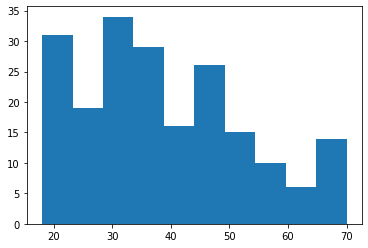

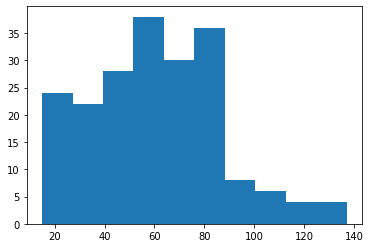

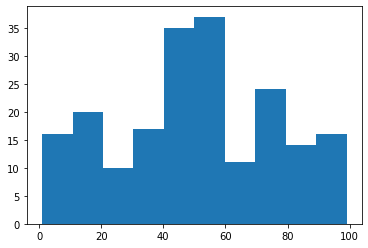

In [9]:
for col in ['age', 'annual_income', 'spending_score']:
    plt.hist(mall[col])
    plt.show()

Boxplots

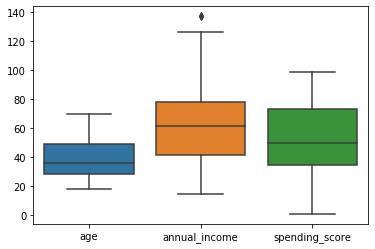

In [10]:
sns.boxplot(data=mall[['age', 'annual_income', 'spending_score']])

nulls, outliers, cut, dropna, fillna, get_dummies (think about if any new features to compute) train, validate, test split update prepare.py file to make necessary changes

In [11]:
mall.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

**Takeaway:** no nulls in dataset

**Cutting / Binning** lets us turn a contiuous variable into a catgorical one by putting the numerical feature into bins

- `pd.cut` creates bins of equal width
- `pd.qcut` creates bins with the same number of observations in each

in both cases the range of the bins is determined from the data (but we couls specify it ourselves)

This can be helpful for initial exploration, interpretation, and visualization.

In [12]:
pd.cut(mall.age, bins=4).value_counts()

(17.948, 31.0]    70
(31.0, 44.0]      61
(44.0, 57.0]      43
(57.0, 70.0]      26
Name: age, dtype: int64

In [13]:
pd.qcut(mall.age, 4).value_counts().sort_index()

(17.999, 28.75]    50
(28.75, 36.0]      54
(36.0, 49.0]       51
(49.0, 70.0]       45
Name: age, dtype: int64

In [14]:
pd.cut(mall.age, bins=[0, 30, 50, 100]).value_counts()

(30, 50]     98
(0, 30]      62
(50, 100]    40
Name: age, dtype: int64

In [15]:
mall['is_female'] = (mall.gender == 'Female').astype('int')
mall.head()

,customer_id,gender,age,annual_income,spending_score,is_female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [16]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(mall, test_size=.15, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)

print('train', train.shape)
print('validate', validate.shape)
print('test', test.shape)

train (144, 6)
validate (26, 6)
test (30, 6)


In [17]:
df = get_mall_data()

def prep_mall_data(df):
    '''
    Take the acquired mall data, does data prep, and returns
    train, test, and vaildate data splits.
    '''
    df['is_female'] = (df.gender == 'Female').astype('int')
    train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)
    return train, test, validate

In [36]:
#prep_mall_data(df)

## Wrangle Exercises

### Acquire

In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import user, host, password
import os

In [20]:
#################### Acquire Telco Data ##################

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def new_telco_data():
    '''
    This function reads the telco_churn customer data from the Codeup db into a df,
    write it to a csv file, and returns the df. 
    '''
    sql_query = '''
                SELECT customer_id, 
                monthly_charges, 
                tenure, 
                total_charges
                FROM customers
                WHERE contract_type_id = 3;'''
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    df.to_csv('telco_churn_df.csv')
    return df

def get_telco_data(cached=False):
    '''
    This function reads in telco churn data from Codeup database if cached == False 
    or if cached == True reads in telco_churn_df from a csv file, returns df
    '''
    if cached or os.path.isfile('telco_churn_df.csv') == False:
        df = new_telco_data()
    else:
        df = pd.read_csv('telco_churn_df.csv', index_col=0)
    return df

In [21]:
df = get_telco_data()

#### Sample and Summarize

In [22]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [23]:
df.shape

(1695, 4)

In [24]:
df.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 66.2+ KB


### Prepare

In [26]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype('float')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB


In [28]:
df.total_charges.isnull().sum()

10

In [29]:
df.total_charges = df.total_charges.fillna(0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB


In [31]:
df.describe()

,monthly_charges,tenure,total_charges
count,1695.000000,1695.000000,1695.000000
mean,60.770413,56.735103,3706.934336
std,34.678865,18.209363,2579.517834
min,18.400000,0.000000,0.000000
25%,24.025000,48.000000,1269.675000
50%,64.350000,64.000000,3593.800000
75%,90.450000,71.000000,5988.800000
max,118.750000,72.000000,8672.450000


### Explore

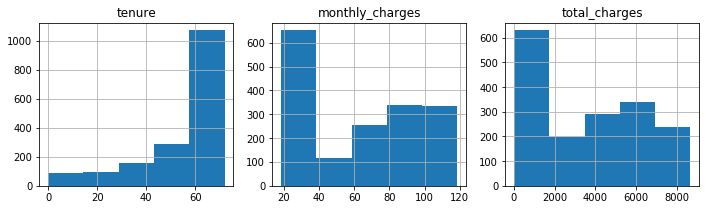

In [32]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['tenure', 'monthly_charges', 'total_charges']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

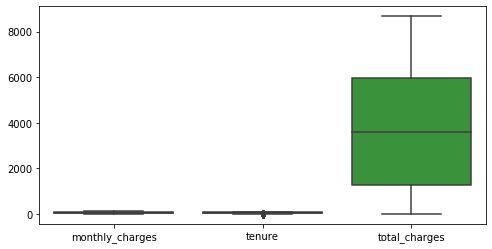

In [33]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['customer_id']))

In [34]:
# Wrangle Function (added to wrangle.py)

In [37]:
# make sure wrangle file is working
from wrangle import wrangle_telco

wrangle_telco = wrangle_telco()
wrangle_telco.head()

,monthly_charges,tenure,total_charges
0,109.70,71,7904.25
1,84.65,63,5377.80
2,90.45,65,5957.90
3,45.20,54,2460.55
4,116.80,72,8456.75
